### 예측함수 정의

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

In [3]:
# 나눔 고딕 폰트의 경로 명시
path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [12]:
# 파이토치 관련 라이브러리
import torch
import torch.nn as nn
from torchviz import make_dot
# 최적화 모듈
import torch.optim as optim

#### 예측함수 내부구조

In [6]:
## 레이어 함수 정의

# 첫번째 선형 함수
# 784 입력 수
# 128 출력 수
l1 = nn.Linear(784, 128)

# 두번째 선형 함수
# 128 입력 수
# 10 출력 수
l2 = nn.Linear(128, 10)

# 활성화 함수
relu = nn.ReLU(inplace=True)

In [7]:
## 입력 텐서로부터 출력 텐서를 계산
# 더미 입력 데이터 작성
inputs = torch.randn(100, 784)

# 중간 텐서 1 계산
m1 = l1(inputs)

# 중간 텐서 2 계산
m2 = relu(m1)

# 출력 텐서 계산
outputs = l2(m2)

# 입력 텐서와 출력 텐서 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


In [8]:
## nn.Sequential을 사용해 전체를 합성 함수로 정의
net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

# 입력 텐서와 출력 텐서의 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs2.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


#### 활성화함수의 목적

- 이전 층 결과값을 다른 층 뉴런으로 전달

- 참고용으로 작성

##### 학습용 데이터 계산

In [9]:
# 훈련 데이터, 검증 데이터 계산
np.random.seed(123)
x = np.random.randn(100,1)

# y는 x^2에 난수를 1/10만큼 더한 값
y = x**2 + np.random.randn(100,1) * 0.1

# 데이터를 50건씩 훈련용과 검증용으로 나눔
x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

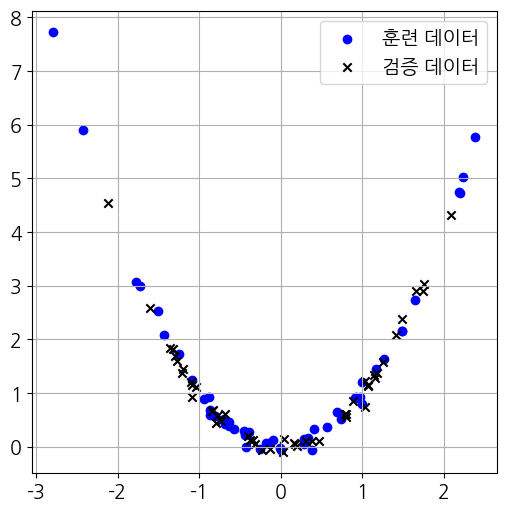

In [10]:
# Scatter plot 출력
plt.scatter(x_train, y_train, c='b', label='훈련 데이터')
plt.scatter(x_test, y_test, c='k', marker='x', label='검증 데이터')
plt.legend()
plt.show()

In [11]:
# 입력 변수 x와 정답 yt의 텐서화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

##### 선형 회귀 모델

In [13]:
# 모델 정의

class Net(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 의 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 1)   
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [15]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net = Net()

# 최적화 알고리즘 : 확률적 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차(Mean Squared Error)
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

#  history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [16]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 4.16121
Epoch 100 loss: 3.22860
Epoch 200 loss: 3.21566
Epoch 300 loss: 3.21545
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

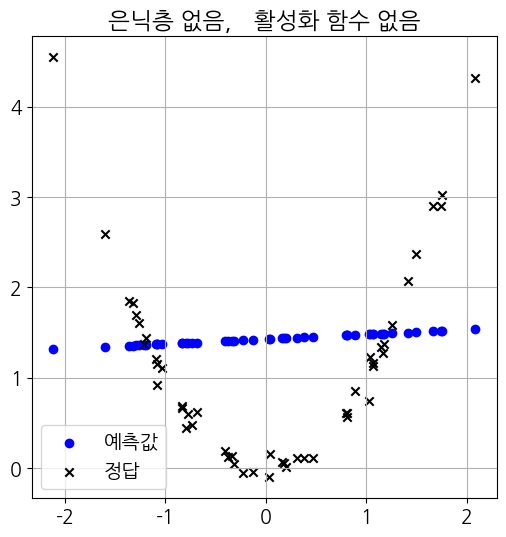

In [17]:
# 결과 그래프
labels_pred = net(inputs_test)

plt.title('은닉층 없음,　활성화 함수 없음')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

##### 유사 딥러닝 모델의 경우

In [18]:
# 모델 정의

class Net2(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [19]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net2 = Net2()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net2.parameters(), lr=lr)

# 손실 함수 : 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [20]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net2(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 6.08910
Epoch 100 loss: 3.21544
Epoch 200 loss: 3.21544
Epoch 300 loss: 3.21544
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

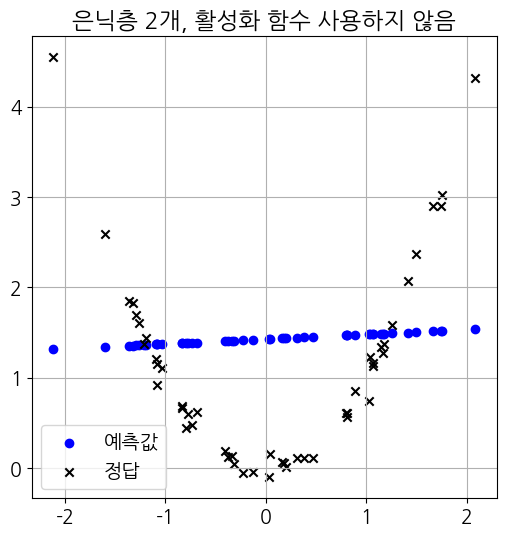

In [21]:
# 결과 그래프
labels_pred2 = net2(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용하지 않음')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

##### 딥러닝 모델(활성화 함수 사용)의 경우

In [22]:
# 모델 정의

class Net3(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [23]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net3 = Net3()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [24]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net3(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 4.62703
Epoch 100 loss: 0.93955
Epoch 200 loss: 0.20017
Epoch 300 loss: 0.11893
Epoch 400 loss: 0.07456
Epoch 500 loss: 0.04834
Epoch 600 loss: 0.03505
Epoch 700 loss: 0.02855
Epoch 800 loss: 0.02467
Epoch 900 loss: 0.02180
Epoch 1000 loss: 0.02041
Epoch 1100 loss: 0.01967
Epoch 1200 loss: 0.01925
Epoch 1300 loss: 0.01898
Epoch 1400 loss: 0.01880
Epoch 1500 loss: 0.01866
Epoch 1600 loss: 0.01856
Epoch 1700 loss: 0.01842
Epoch 1800 loss: 0.01801
Epoch 1900 loss: 0.01778
Epoch 2000 loss: 0.01760
Epoch 2100 loss: 0.01747
Epoch 2200 loss: 0.01736
Epoch 2300 loss: 0.01727
Epoch 2400 loss: 0.01719
Epoch 2500 loss: 0.01712
Epoch 2600 loss: 0.01704
Epoch 2700 loss: 0.01698
Epoch 2800 loss: 0.01675
Epoch 2900 loss: 0.01651
Epoch 3000 loss: 0.01634
Epoch 3100 loss: 0.01621
Epoch 3200 loss: 0.01602
Epoch 3300 loss: 0.01584
Epoch 3400 loss: 0.01575
Epoch 3500 loss: 0.01566
Epoch 3600 loss: 0.01559
Epoch 3700 loss: 0.01552
Epoch 3800 loss: 0.01546
Epoch 3900 loss: 0.01540
Epoch 4000 l

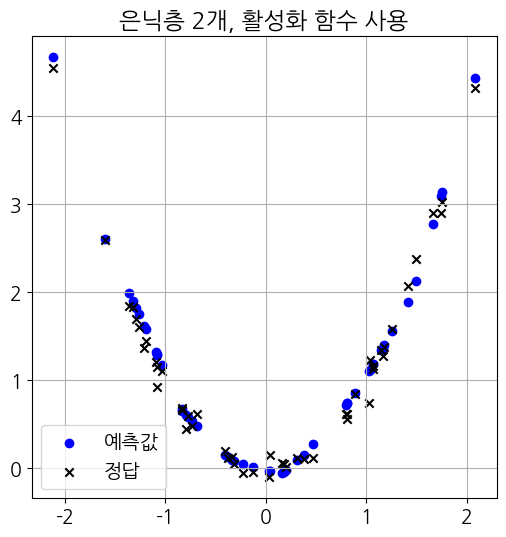

In [25]:
# 결과 그래프
labels_pred3 = net3(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()